# Chapter 1: Google Colab Setup

## Import libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

## Check Library Versions

In [2]:
print('Python version: ', sys.version)
print('NumPy version: ', np.__version__)
print('Pandas version: ', pd.__version__)
print('TensorFlow version: ', tf.__version__)

Python version:  3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
NumPy version:  1.19.0
Pandas version:  1.0.5
TensorFlow version:  2.2.0


## Manipulating Data with Pandas

Workflow

1. Create a 4 column DataFrame with 10 rows, the first column being a date field and the rest numbers.

2. Fill the first column with the first day of each month for 3 years (for example: 1/1/2018, 2/1/2018).

3. Fill the next 2 columns with random numbers.

4. Fill the 4th column with the difference of the first 2 data columns (for example: Col3 - Col2).

5. Break the DataFrame into 3 different DataFrames based on the dates (for example: 2018, 2019, 2020)

In [3]:
# It is best practice NOT to initialize an empty dataframe as it takes up a lot of memory
# beforehand and grows linearly as the number of rows increase. Best to have the dataframe
# at hand and then fill-up create the dataframe

# First column
df_date = pd.date_range(start='1/1/2018', end='12/31/2020', freq='MS')

length = len(df_date)

df_date

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [4]:
# Second & third column
col_a = np.random.randint(20,size=length)
col_b = np.random.randint(20,size=length)

In [5]:
my_dict = {'Date':df_date, 'A':col_a, 'B':col_b}

In [6]:
df = pd.DataFrame(my_dict)

In [7]:
df.head()

,Date,A,B
0,2018-01-01,9,2
1,2018-02-01,10,14
2,2018-03-01,9,1
3,2018-04-01,6,4
4,2018-05-01,9,9


In [8]:
df['C'] = df.B - df.A

In [9]:
df.head()

,Date,A,B,C
0,2018-01-01,9,2,-7
1,2018-02-01,10,14,4
2,2018-03-01,9,1,-8
3,2018-04-01,6,4,-2
4,2018-05-01,9,9,0


In [10]:
# here is one brute force way but I dont like it
df_01 = df[df['Date'].dt.year == 2018]
df_02 = df[df['Date'].dt.year == 2019]
df_03 = df[df['Date'].dt.year == 2020]

In [11]:
# Found this on stackoverflow
# https://stackoverflow.com/questions/51072938/how-to-split-dataframe-based-on-years-in-python
# But I am still not satisfied
def split_years(dt):
    dt['year'] = dt['Date'].dt.year
    return [dt[dt['year'] == y] for y in dt['year'].unique()]

In [12]:
DF = split_years(df)

In [13]:
df1 = pd.DataFrame(DF[0])
df2 = pd.DataFrame(DF[1])
df3 = pd.DataFrame(DF[2])

In [14]:
df1

,Date,A,B,C,year
0,2018-01-01,9,2,-7,2018
1,2018-02-01,10,14,4,2018
2,2018-03-01,9,1,-8,2018
3,2018-04-01,6,4,-2,2018
4,2018-05-01,9,9,0,2018
5,2018-06-01,4,9,5,2018
6,2018-07-01,11,12,1,2018
7,2018-08-01,18,13,-5,2018
8,2018-09-01,3,5,2,2018
9,2018-10-01,9,6,-3,2018


In [15]:
df2

,Date,A,B,C,year
12,2019-01-01,15,19,4,2019
13,2019-02-01,10,14,4,2019
14,2019-03-01,0,18,18,2019
15,2019-04-01,14,1,-13,2019
16,2019-05-01,11,10,-1,2019
17,2019-06-01,14,18,4,2019
18,2019-07-01,19,15,-4,2019
19,2019-08-01,0,16,16,2019
20,2019-09-01,0,4,4,2019
21,2019-10-01,9,17,8,2019


In [16]:
df3

,Date,A,B,C,year
24,2020-01-01,9,1,-8,2020
25,2020-02-01,11,4,-7,2020
26,2020-03-01,16,9,-7,2020
27,2020-04-01,3,11,8,2020
28,2020-05-01,18,18,0,2020
29,2020-06-01,17,13,-4,2020
30,2020-07-01,12,16,4,2020
31,2020-08-01,2,9,7,2020
32,2020-09-01,14,19,5,2020
33,2020-10-01,3,11,8,2020


## Create a Neural Network to Convert Celcius to Fahrenheit

Create a neural network that can convert Celsius to Fahrenheit and examine the weights.

- Using TensorFlow andKeras build a single layered network with a single input and a single output and a single neuron

- Using NumPy generate ~20 input/output values to test

- Train the neural network on your data

- Test the neural network to see if it is working

- Examine the weights to see if they match F = C * 1.8 + 32

In [17]:
# Create a function to compute fahrenheit
def CtoF(cel):
    return (1.8*cel + 32.0)

In [18]:
# Create model
L1 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential(L1)
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss='mse', metrics='mse')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Create a test case of about 20 points
celcius = np.linspace(-20,100,21)
print(celcius)

[-20. -14.  -8.  -2.   4.  10.  16.  22.  28.  34.  40.  46.  52.  58.
  64.  70.  76.  82.  88.  94. 100.]


In [21]:
fahrenheit = CtoF(celcius)
print(fahrenheit)

[ -4.    6.8  17.6  28.4  39.2  50.   60.8  71.6  82.4  93.2 104.  114.8
 125.6 136.4 147.2 158.  168.8 179.6 190.4 201.2 212. ]


In [22]:
# Now let's train our Neural Network
history = model.fit(celcius,fahrenheit,epochs=1000,verbose=False)

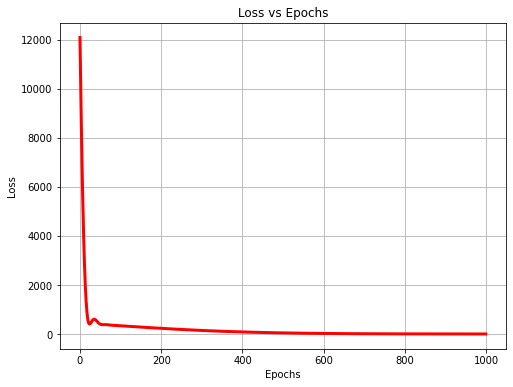

In [23]:
# Plot loss history
fig = plt.figure(figsize=(8,6))
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.plot(history.history['loss'],linewidth=3,color='red')
plt.grid()
plt.show()

In [27]:
# Now lets make a prediction
x_test = 300
y_test = CtoF(x_test)
print(y_test)

572.0


In [30]:
y_pred = model.predict([x_test])

In [31]:
# Lets look at the weights
print('These are the internal layer variables{}'.format(L1.get_weights()))

These are the internal layer variables[array([[1.8151741]], dtype=float32), array([30.899939], dtype=float32)]


In [40]:
error = y_pred - y_test

print('Percent error = {:.2f}%'.format(error[0][0]/(y_test)*100))

Percent error = 0.60%
